In [1]:
import pandas as pd

In [2]:
stocks = pd.read_csv('input_data/stock_px.csv', parse_dates=True, index_col=0)
stocks.head()

,AAPL,MSFT,XOM,SPX
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01
2003-01-07,7.43,21.93,28.95,922.93
2003-01-08,7.28,21.31,28.83,909.93


In [3]:
pd.date_range(start='2021-08-01', end='2021-10-01', freq='2D')

DatetimeIndex(['2021-08-01', '2021-08-03', '2021-08-05', '2021-08-07',
               '2021-08-09', '2021-08-11', '2021-08-13', '2021-08-15',
               '2021-08-17', '2021-08-19', '2021-08-21', '2021-08-23',
               '2021-08-25', '2021-08-27', '2021-08-29', '2021-08-31',
               '2021-09-02', '2021-09-04', '2021-09-06', '2021-09-08',
               '2021-09-10', '2021-09-12', '2021-09-14', '2021-09-16',
               '2021-09-18', '2021-09-20', '2021-09-22', '2021-09-24',
               '2021-09-26', '2021-09-28', '2021-09-30'],
              dtype='datetime64[ns]', freq='2D')

In [4]:
pd.date_range(start='2021-08-07', periods=5, freq='4h')

DatetimeIndex(['2021-08-07 00:00:00', '2021-08-07 04:00:00',
               '2021-08-07 08:00:00', '2021-08-07 12:00:00',
               '2021-08-07 16:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [5]:
pd.date_range(start='2021-08-01', end='2021-10-01', freq='2D')[0].day_name()

'Sunday'

In [6]:
stocks_all = pd.read_csv('input_data/stock_px.csv', parse_dates=True, index_col=0)
stocks = stocks_all[['AAPL', 'MSFT', 'XOM']]
stocks.shape


(2214, 3)

In [7]:
stocks.head


<bound method NDFrame.head of               AAPL   MSFT    XOM
2003-01-02    7.40  21.11  29.22
2003-01-03    7.45  21.14  29.24
2003-01-06    7.45  21.52  29.96
2003-01-07    7.43  21.93  28.95
2003-01-08    7.28  21.31  28.83
...            ...    ...    ...
2011-10-10  388.81  26.94  76.28
2011-10-11  400.29  27.00  76.27
2011-10-12  402.19  26.96  77.16
2011-10-13  408.43  27.18  76.37
2011-10-14  422.00  27.27  78.11

[2214 rows x 3 columns]>

In [8]:
stocks_w = stocks.resample('W').first()
print(stocks_w.shape)
stocks_w.head()

(459, 3)


,AAPL,MSFT,XOM
2003-01-05,7.40,21.11,29.22
2003-01-12,7.45,21.52,29.96
2003-01-19,7.32,22.16,28.91
2003-01-26,7.01,20.17,27.94
2003-02-02,7.07,19.32,26.21


In [9]:
stocks_2w = stocks.resample('2W').mean()
print(stocks_2w.shape)
stocks_2w.head()

(230, 3)


,AAPL,MSFT,XOM
2003-01-05,7.425000,21.125000,29.230000
2003-01-19,7.306000,21.729000,29.056000
2003-02-02,7.123333,19.561111,27.384444
2003-02-16,7.231000,18.561000,27.854000
2003-03-02,7.447778,19.036667,28.131111


In [10]:
stocks_m = stocks.resample('M').sum()
print(stocks_m.shape)
stocks_m.head()

(106, 3)


,AAPL,MSFT,XOM
2003-01-31,152.02,435.59,595.48
2003-02-28,139.34,356.94,531.72
2003-03-31,153.28,407.30,610.37
2003-04-30,145.40,417.30,610.06
2003-05-31,186.59,418.88,624.30


In [11]:
stocks_6h_sum = stocks.resample('6H').sum()
print(stocks_6h_sum.shape)
stocks_6h_sum.head()

(12829, 3)


,AAPL,MSFT,XOM
2003-01-02 00:00:00,7.40,21.11,29.22
2003-01-02 06:00:00,0.00,0.00,0.00
2003-01-02 12:00:00,0.00,0.00,0.00
2003-01-02 18:00:00,0.00,0.00,0.00
2003-01-03 00:00:00,7.45,21.14,29.24


In [12]:
stocks_6h_ffill = stocks.resample('6H').ffill()
print(stocks_6h_ffill.shape)
stocks_6h_ffill.head()

(12829, 3)


,AAPL,MSFT,XOM
2003-01-02 00:00:00,7.40,21.11,29.22
2003-01-02 06:00:00,7.40,21.11,29.22
2003-01-02 12:00:00,7.40,21.11,29.22
2003-01-02 18:00:00,7.40,21.11,29.22
2003-01-03 00:00:00,7.45,21.14,29.24


<AxesSubplot:>

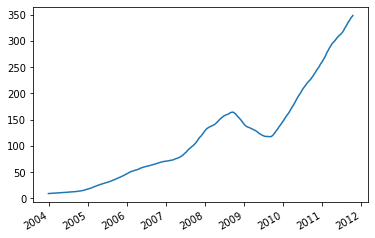

In [13]:
stocks['AAPL'].rolling(250).mean().plot()

<AxesSubplot:>

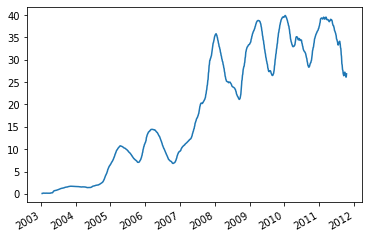

In [14]:
stocks['AAPL'].rolling(250, min_periods=10).std().plot()